# Mapping Brand Perceptions using R - Market Research

### Example Consumer Brand Rating Survey,

Generic Brand Names: Brand 1, Brand 2, Brand 3,  Brand 4, Brand 5

Consumer are asked to answer the question below using the following scale:  
Likert Scale of 1 to 10, 1 = Strongly Disagree, 10 = Strongly Agree

**Example Survey**  
Leader = Brand the market leader?  
Perf = Brand the performance leader?  
Innovation =  Brand innovative?  
Price = Brand competively priced?  
Social = Brand is socially consious?  
CustServ = Brand have Good Customer Service?  
Value = Brand a good value?  
Cool = Brand is Cool?  
Loyal =  I would buy from Brand again.


### Load Simulated Data

In [1]:
options(warn=-1) #surpress warnings for presentation purposes only

BrandRdf <- read.csv("BrandRdf.csv", header = TRUE, stringsAsFactors=FALSE)
str(BrandRdf)

'data.frame':	500 obs. of  10 variables:
 $ Leader    : int  2 1 2 1 1 2 1 2 2 3 ...
 $ Perf      : int  4 1 3 6 1 8 1 1 1 1 ...
 $ Innovation: int  8 4 5 10 5 9 5 7 8 9 ...
 $ Price     : int  8 7 9 8 8 5 7 5 10 8 ...
 $ Social    : int  2 1 2 3 1 3 1 2 1 1 ...
 $ CustServ  : int  9 1 9 4 9 8 5 8 7 3 ...
 $ Value     : int  7 1 5 5 9 7 1 7 7 3 ...
 $ Cool      : int  4 2 1 2 1 1 1 7 5 4 ...
 $ Loyal     : int  6 2 6 1 1 2 1 1 1 1 ...
 $ Brand     : chr  "Brand 1" "Brand 1" "Brand 1" "Brand 1" ...


### Data Analysis

corrplot 0.90 loaded



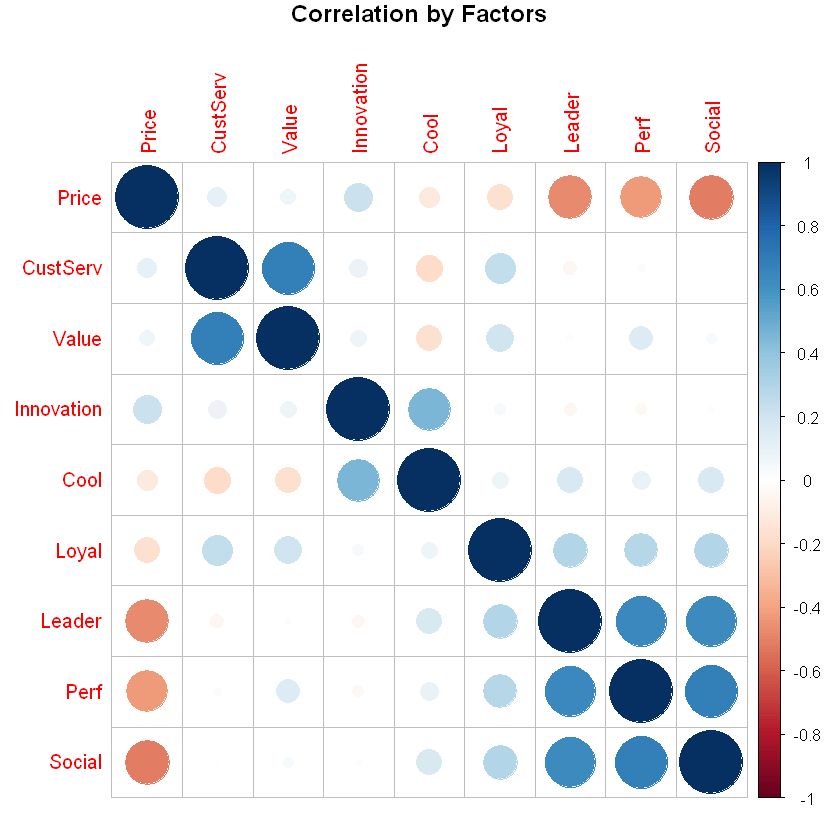

In [2]:
#Correlation Plot
library(corrplot)
corrplot(cor(BrandRdf[, 1:9]), order="hclust", mar=c(0,0,1,0), title = 'Correlation by Factors')

#### ANALYSIS
The correlation plot indicates the strength of the relationship between two variables. Colour indicates positive or negative relationship while the darker the shade indicates strength. The size of the circle also indicates strength.  
  
Price is negatively correlated with the factors of Leadership, Performance and Socially Consiousness. The latter three are all positively correlated to each other. Customer Service is posivitely correlated with Value. Interesting that cool are Innovate are positively correlated. Lastly, Loyalty has a postive correlation to all factors with the exception of Price.

Using Brand as id variables



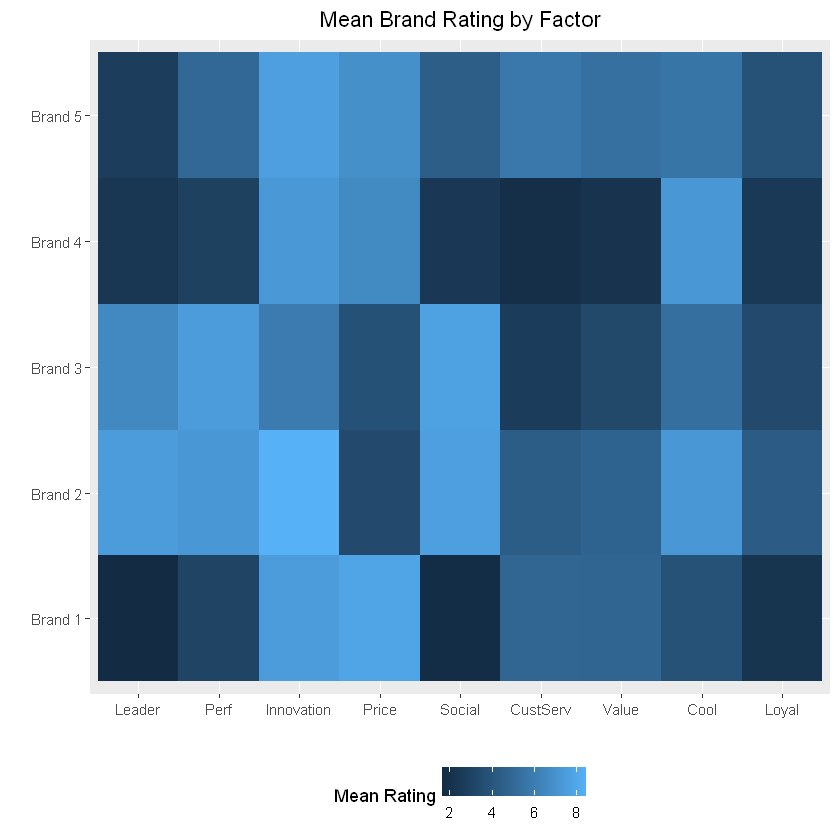

In [3]:
#Heatmap
suppressPackageStartupMessages(library(dplyr))
library(dplyr)
library(reshape2)

#Create a HeatMap
BrandM <- BrandRdf %>%
  group_by(Brand) %>%
  summarise_all(list(mean)) %>% melt()  #Reshape to long

library(ggplot2)
library(RColorBrewer)
ggplot(data = BrandM, aes(x = variable, y = Brand)) + ggtitle('Mean Brand Rating by Factor') +
  geom_tile(aes(fill = value))+ xlab("") + ylab("") + labs(fill = 'Mean Rating') + 
  theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5))

#### ANALYSIS  
The Heatmap details the mean Brand rating by factor. Lighter shaded cells indicate a higher mean. Brand 2 receives the highest ratings across factors. Brand 2 and Brand 3 have a very similar rating patterns (although Brand 2 fairs better). Brand 4 receives the lowest across the factors. 

In [4]:
#PCA on Brand Means
#BrandPC <- prcomp(BrandRdf[, 1:9])
#summary(BrandPC)

BrandM <- dcast(BrandM,Brand ~ variable)  #Reshape to wide

BrandMPC <- prcomp(BrandM[,2:10], scale=TRUE)
summary(BrandMPC)

Importance of components:
                          PC1    PC2    PC3    PC4      PC5
Standard deviation     2.1791 1.6298 1.1725 0.4695 3.23e-16
Proportion of Variance 0.5276 0.2951 0.1527 0.0245 0.00e+00
Cumulative Proportion  0.5276 0.8228 0.9755 1.0000 1.00e+00

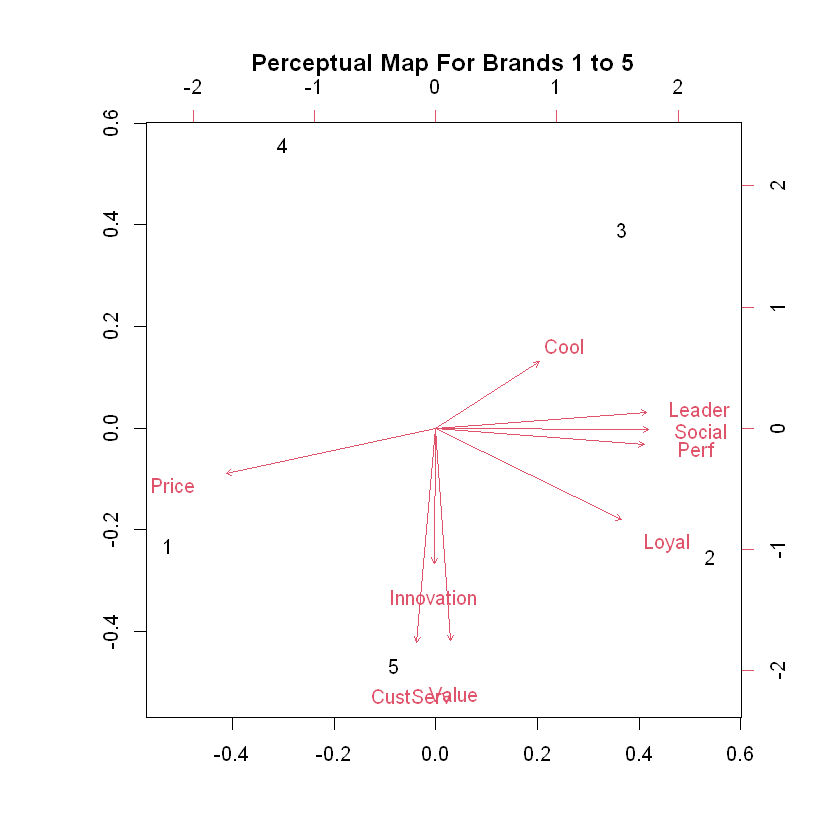

In [5]:
#PLOT THE PERCEPTUAL MAP
biplot(BrandMPC, arrow.len = .05, cex = rep(par("cex"), 0), xlab = "", ylab = "",
       expand = 1, main = "Perceptual Map For Brands 1 to 5", pc.biplot = FALSE)

#### ANALYSIS  

How to interpet the perceptual map? The fist thing to notice is that are brands are well separated from each other on the map, so there is good separation among brands in this hypothetical market. The factors are represented by arrows on the map. Factors close to each other are more likely to be correlated with each other and vice versa. As you see on the map, Price is directly oppositve of Leadership, Social Consciousness and Perforance and thus, negatively correlated.  

Consumers closely associate Brand 5 with Innovation, Customer Service and Value. In contrast, Brand 3 and 4 are more closely associated with Cool and Price respectively. Brand 1 is clearly perceived as the Price leader. Finally, Brand 1 seems to be in the best position of all. Consumers perceive them with higher Loyalty as well as Leadership, Social Consciousness and Perforance.

In [6]:
#Create the Perceptual Map

# Pieces from the PCA used in the biplot.
BrandMPC_pca_loadings <- BrandMPC$rotation # Loadings Matrix
BrandMPC_pca_scores <- predict(BrandMPC) # Scores Matris
BrandMPC_pca_importance <- summary(BrandMPC)$importance # Explained Variance

In [7]:
BrandMPC_pca_scores

PC1,PC2,PC3,PC4,PC5
-2.5655681,-0.8429068,-0.72233600,-0.50719406,-3.330669e-16
2.6340211,-0.9197369,1.02842497,-0.37886402,-4.440892e-16
1.7866485,1.4274584,-1.54172744,0.08340283,7.494005e-16
-1.4575296,2.0350193,1.24185616,0.12566868,1.665335e-16
-0.3975718,-1.6998340,-0.00621769,0.67698657,1.110223e-15
